In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages


# 设置全局字体为 Times New Roman，字号为12
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12






In [28]:
# 使用相对路径加载数据
df = pd.read_csv('../data/train.csv')
# 简单预览数据
print(df.info())
# 简单预览数据
print(df.head(30))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


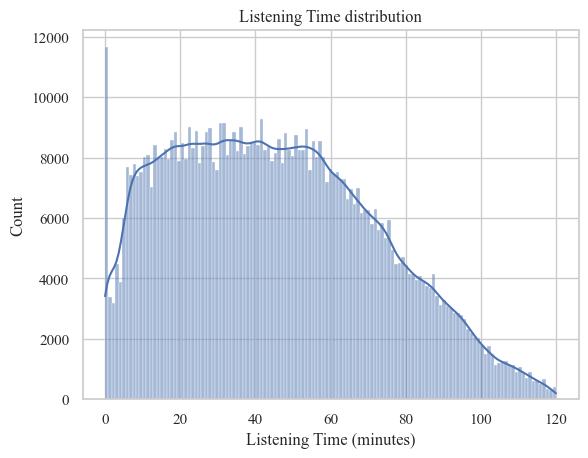

In [29]:
# 收听时长的分布
sns.histplot(df['Listening_Time_minutes'], kde=True)
plt.title("Listening Time distribution")
plt.xlabel("Listening Time (minutes)")
plt.show()


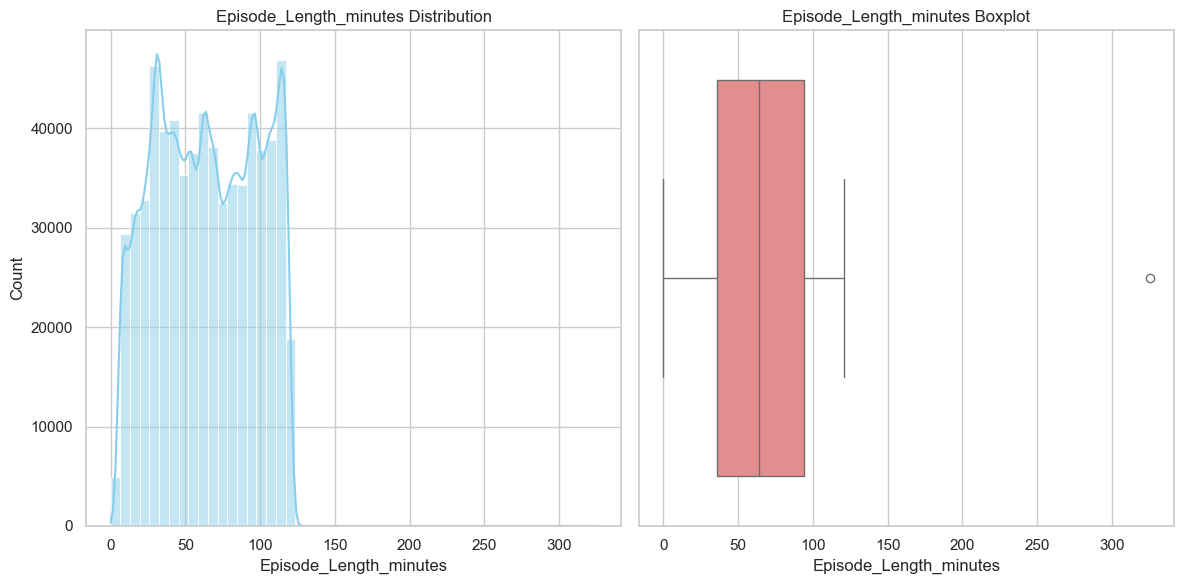

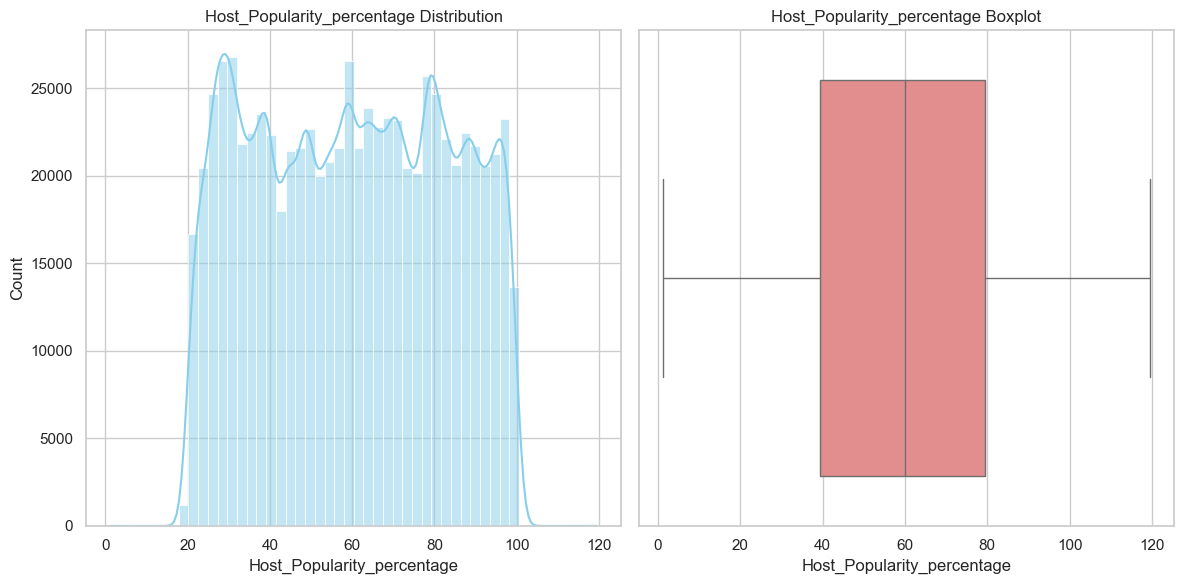

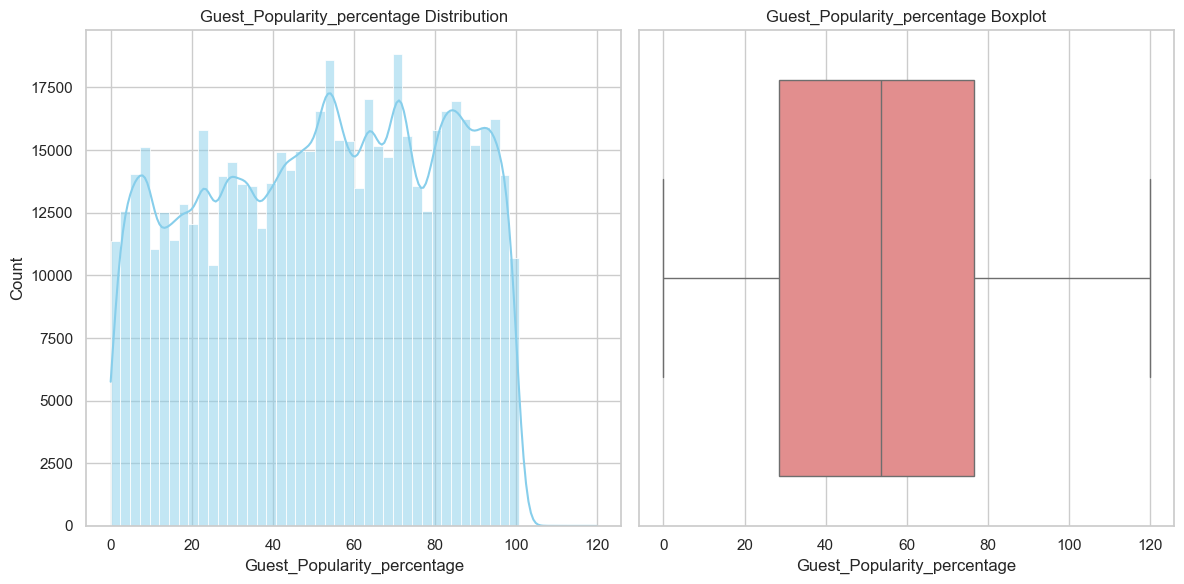

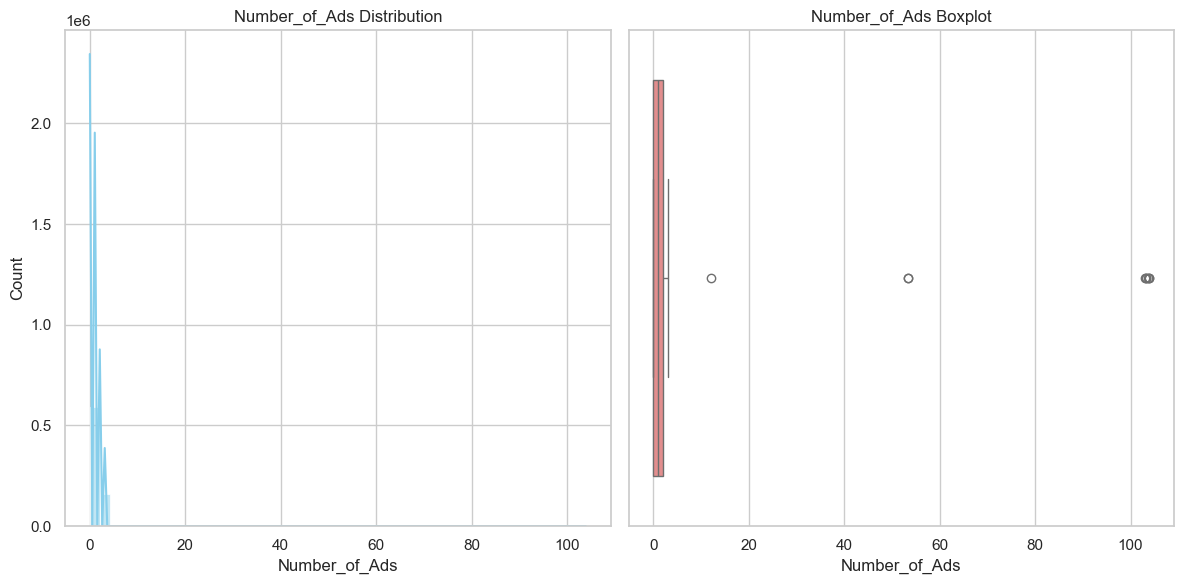

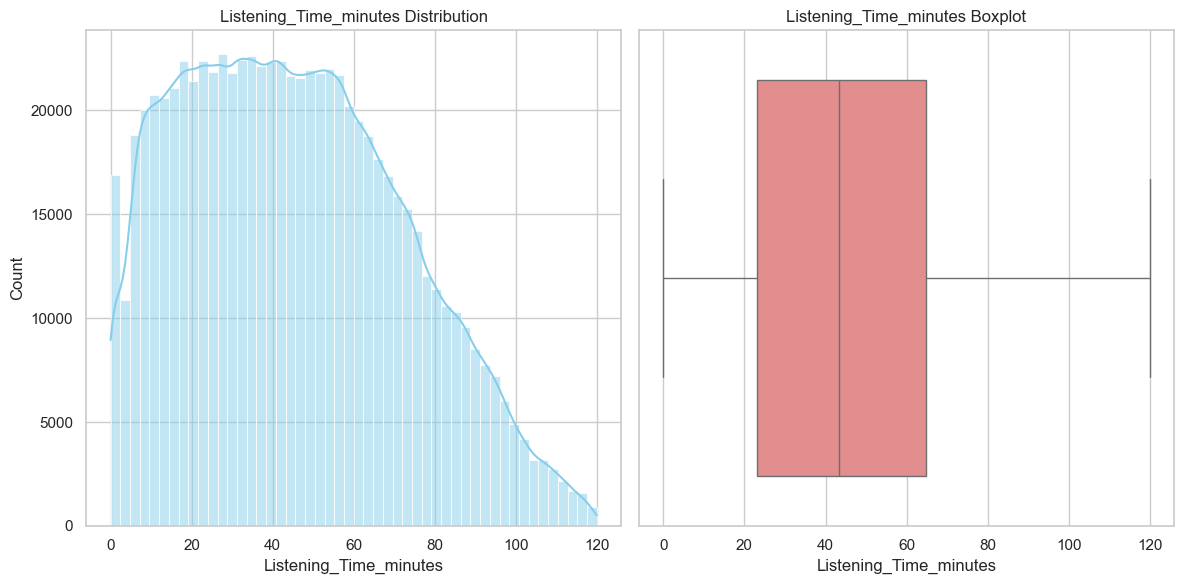

C:\Users\haokw\AppData\Local\Temp\ipykernel_19936\617259375.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="Set2")


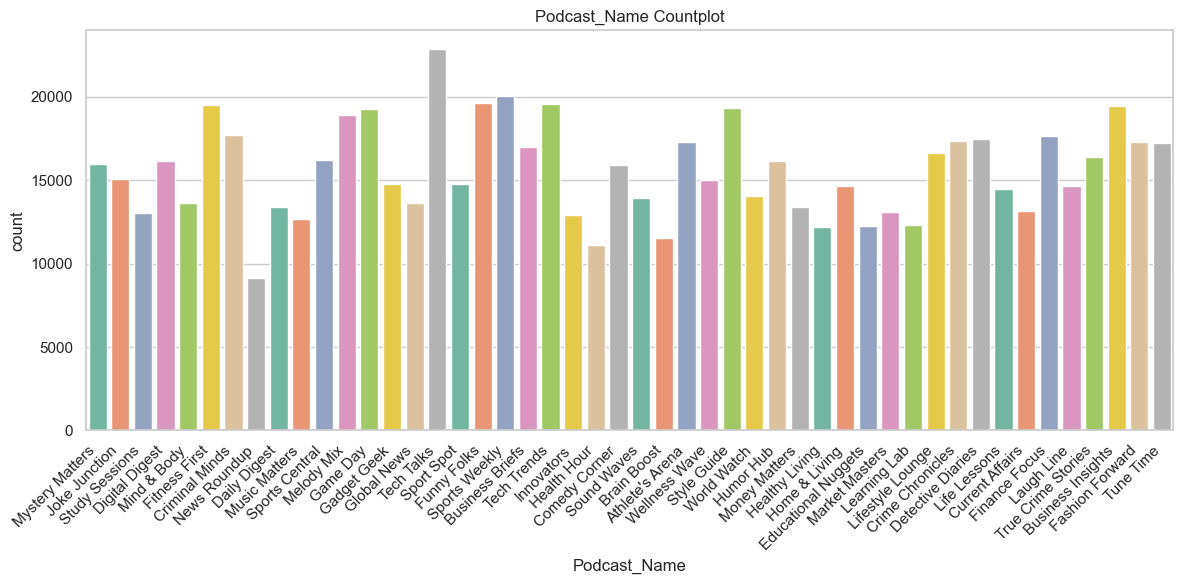

C:\Users\haokw\AppData\Local\Temp\ipykernel_19936\617259375.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="Set2")


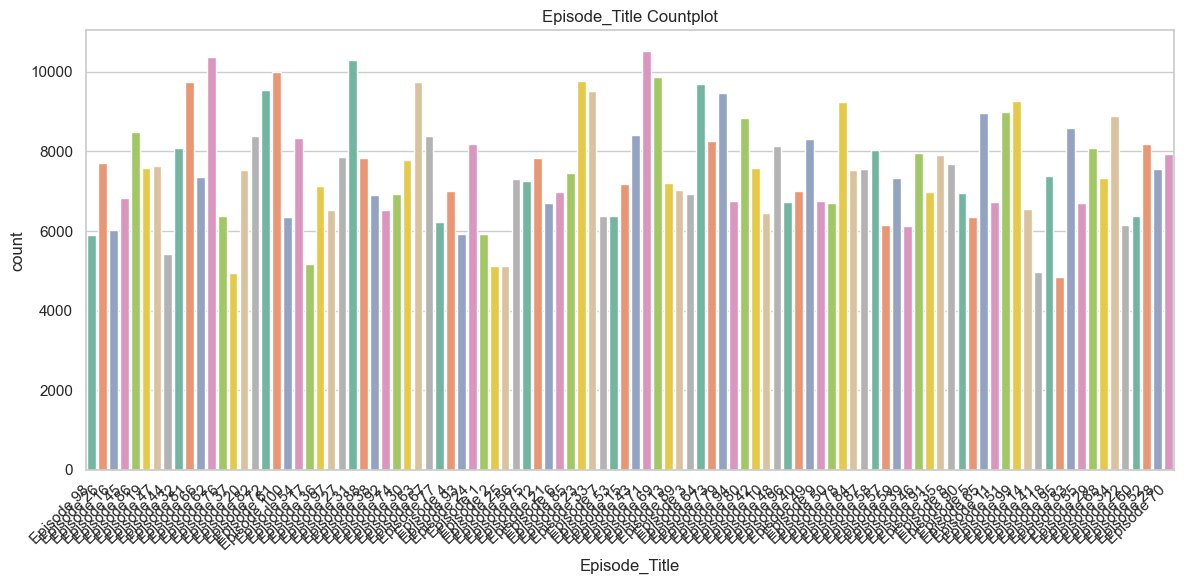

C:\Users\haokw\AppData\Local\Temp\ipykernel_19936\617259375.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="Set2")


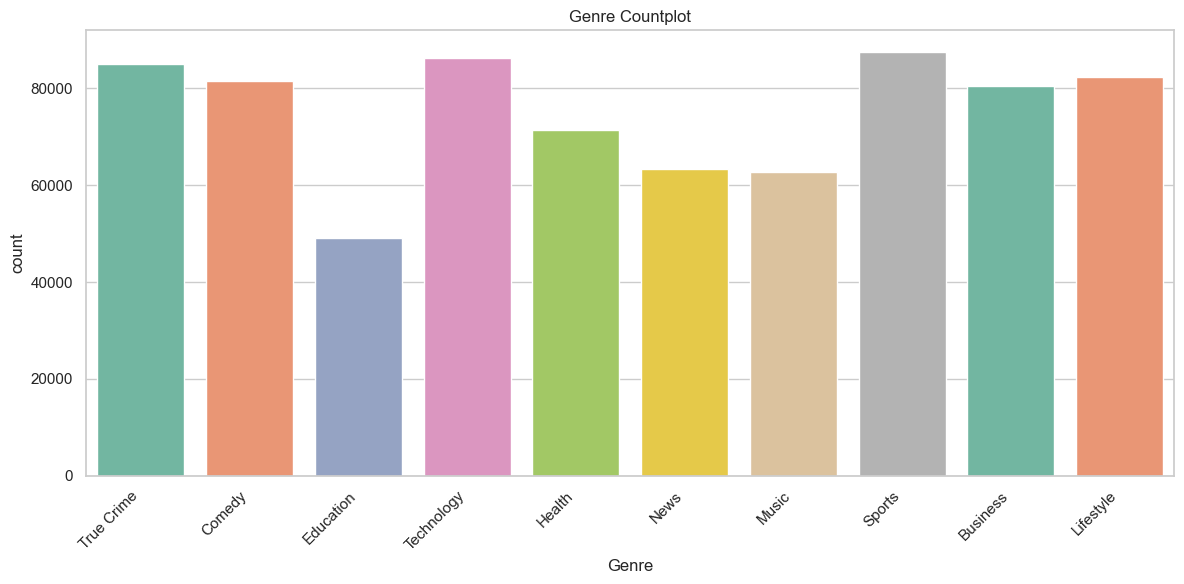

C:\Users\haokw\AppData\Local\Temp\ipykernel_19936\617259375.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="Set2")


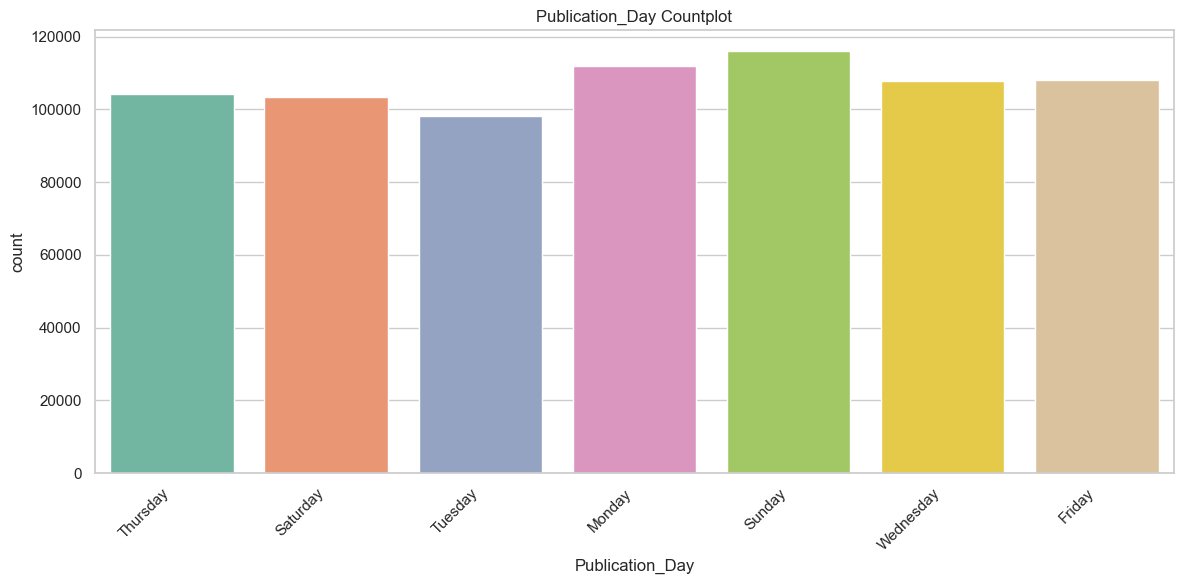

C:\Users\haokw\AppData\Local\Temp\ipykernel_19936\617259375.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="Set2")


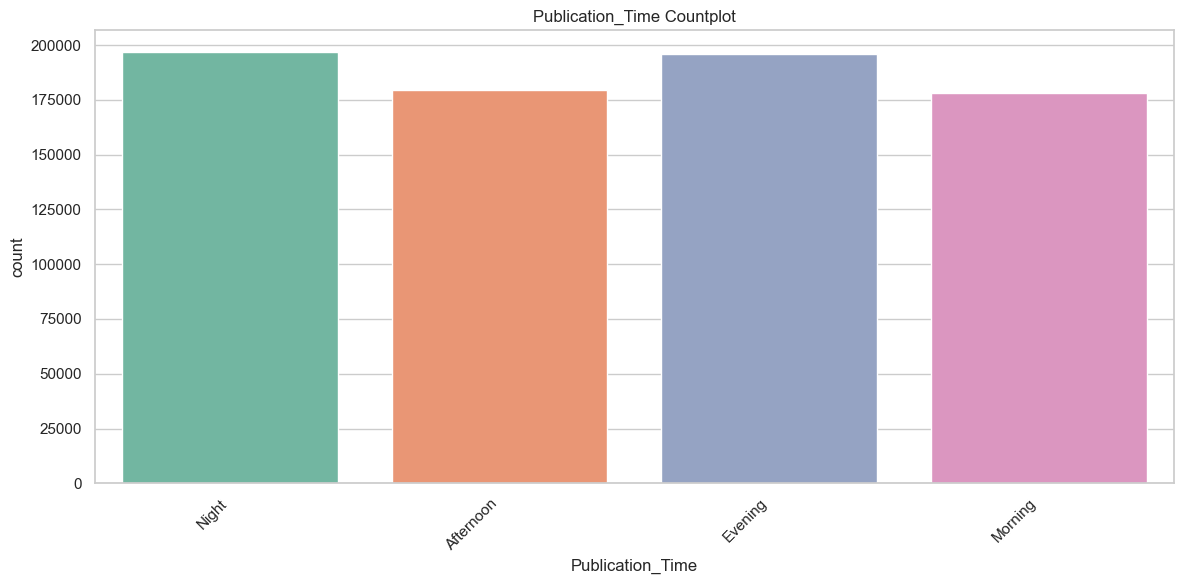

C:\Users\haokw\AppData\Local\Temp\ipykernel_19936\617259375.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="Set2")


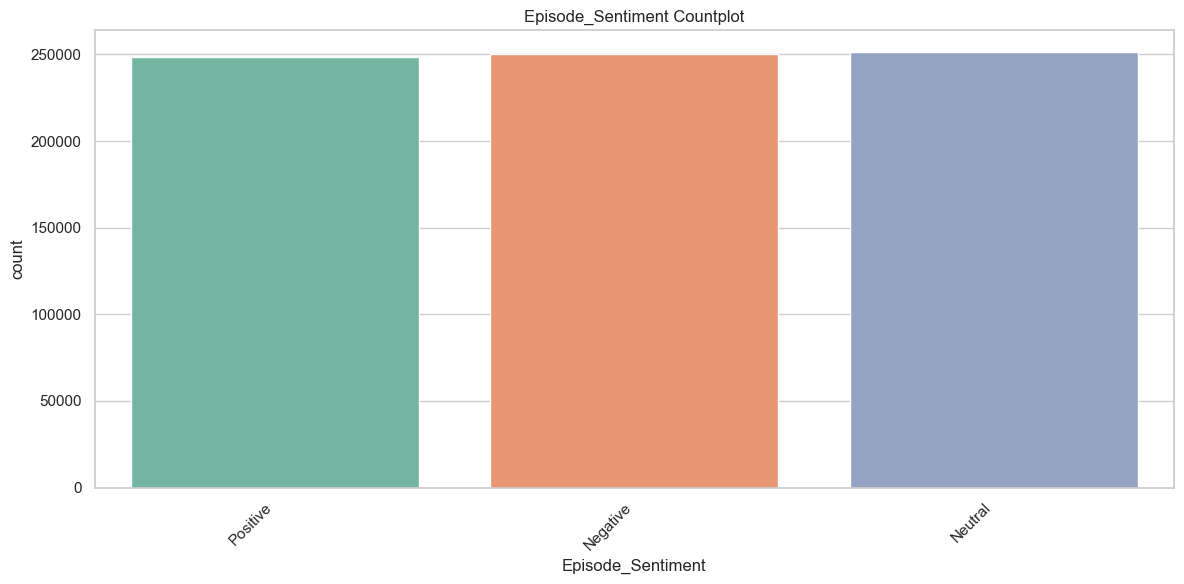

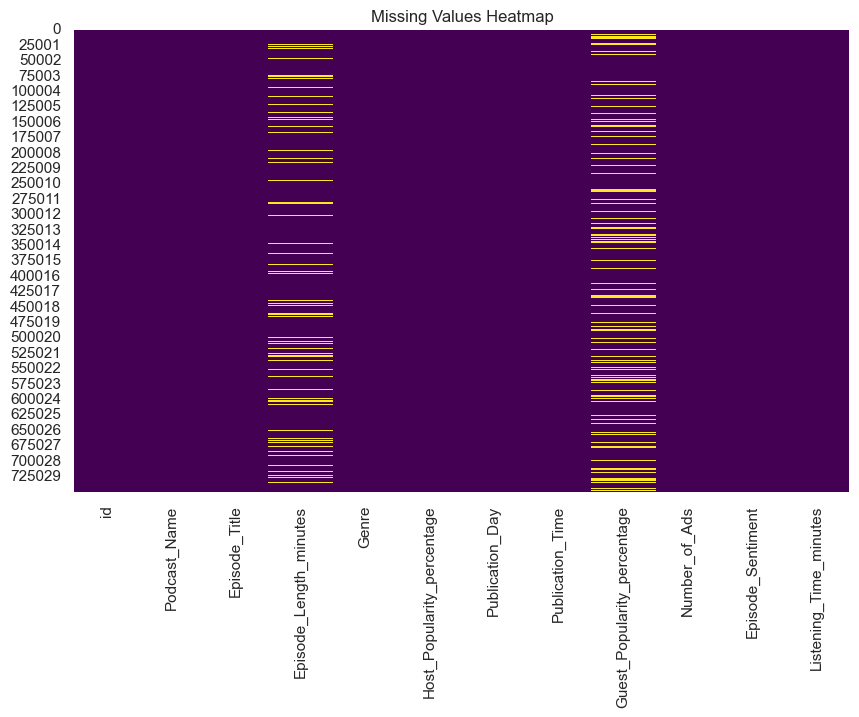

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置图形样式
sns.set(style="whitegrid")

# 数值型变量可视化
numerical_columns = [
    'Episode_Length_minutes', 
    'Host_Popularity_percentage', 
    'Guest_Popularity_percentage', 
    'Number_of_Ads', 
    'Listening_Time_minutes'
]

# 类别型变量可视化
categorical_columns = [
    'Podcast_Name', 
    'Episode_Title', 
    'Genre', 
    'Publication_Day', 
    'Publication_Time', 
    'Episode_Sentiment'
]

# 对每个数值型变量进行可视化
for col in numerical_columns:
    plt.figure(figsize=(12, 6))
    
    # 直方图
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=50, kde=True, color='skyblue')
    plt.title(f'{col} Distribution')
    
    # 箱线图
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'{col} Boxplot')

    plt.tight_layout()
    plt.show()

# 对每个类别型变量进行可视化
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    
    # 条形图
    sns.countplot(x=df[col], palette="Set2")
    plt.title(f'{col} Countplot')
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

# 对缺失值进行可视化（热图）
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [33]:
# 将超过100的值设为缺失值（NaN）
df.loc[df['Episode_Length_minutes'] > 150, 'Episode_Length_minutes'] = np.nan
df.loc[df['Host_Popularity_percentage'] > 100, 'Host_Popularity_percentage'] = np.nan
df.loc[df['Guest_Popularity_percentage'] > 100, 'Guest_Popularity_percentage'] = np.nan
df.loc[df['Number_of_Ads'] > 10, 'Number_of_Ads'] = np.nan



In [35]:
# 去除含有缺失值的行
df_cleaned = df.dropna().reset_index(drop=True)
print(df_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539002 entries, 0 to 539001
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           539002 non-null  int64  
 1   Podcast_Name                 539002 non-null  object 
 2   Episode_Title                539002 non-null  object 
 3   Episode_Length_minutes       539002 non-null  float64
 4   Genre                        539002 non-null  object 
 5   Host_Popularity_percentage   539002 non-null  float64
 6   Publication_Day              539002 non-null  object 
 7   Publication_Time             539002 non-null  object 
 8   Guest_Popularity_percentage  539002 non-null  float64
 9   Number_of_Ads                539002 non-null  float64
 10  Episode_Sentiment            539002 non-null  object 
 11  Listening_Time_minutes       539002 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 49.3+ MB
